In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob 

In [2]:
dfs = []
# for each json file in logs folder
files = sorted(glob.glob('logs/*.json'))
for filename in files:
    # read the json file
    df = pd.read_json(filename)
    # parse filename to extract parameters
    params = filename.split('/')[-1].replace('.json', '').split('_')
    parsed_params = {param.split('=')[0]: param.split('=')[1] for param in params if '=' in param}
    
    # add parameters to the dataframe
    df['data'] = parsed_params['musdb']
    df['epochs'] = parsed_params['epochs']
    df['loss'] = list(parsed_params.keys())[-2]
    
    dfs.append(df)
    
dfs[0]

,train,valid,best,duration,model_size,true_model_size,compressed_model_size,data,epochs,loss
0,3.497382,7.183918,7.183918,1115.049118,0,0,0,noaug,150,SISDR
1,3.289282,7.064941,7.064941,1135.221412,0,0,0,noaug,150,SISDR
2,3.186990,6.953322,6.953322,1133.909366,0,0,0,noaug,150,SISDR
3,3.166380,6.995408,6.953322,1259.181104,0,0,0,noaug,150,SISDR
4,3.120180,6.939237,6.939237,1542.190504,0,0,0,noaug,150,SISDR
...,...,...,...,...,...,...,...,...,...,...
145,2.828038,6.598877,6.593092,1171.463941,0,0,0,noaug,150,SISDR
146,2.809215,6.661566,6.593092,1174.389766,0,0,0,noaug,150,SISDR
147,2.830174,6.593994,6.593092,1174.595171,0,0,0,noaug,150,SISDR
148,2.811722,6.642846,6.593092,1175.897000,0,0,0,noaug,150,SISDR


In [3]:
def plot_trainig(df):
    # plot loss train valid vs index 
    plt.figure(figsize=(10, 5))
    plt.plot(df['train'], label='Train Loss')
    plt.plot(df['valid'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{df["data"].iloc[0]} - {df["loss"].iloc[0]}')
    plt.legend()
    plt.grid()
    plt.xlim(0, int(df['epochs'].iloc[0]))
    plt.show()

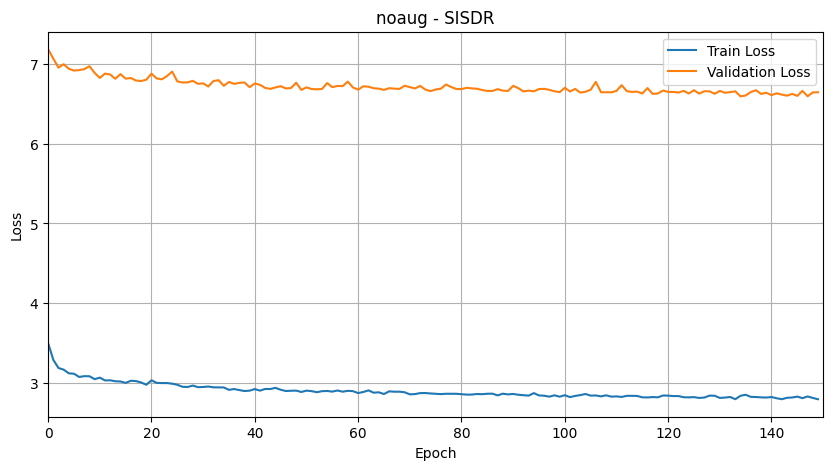

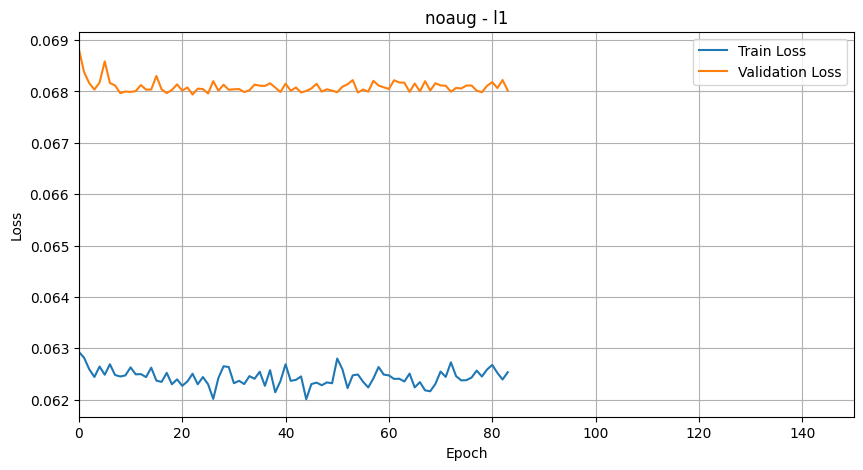

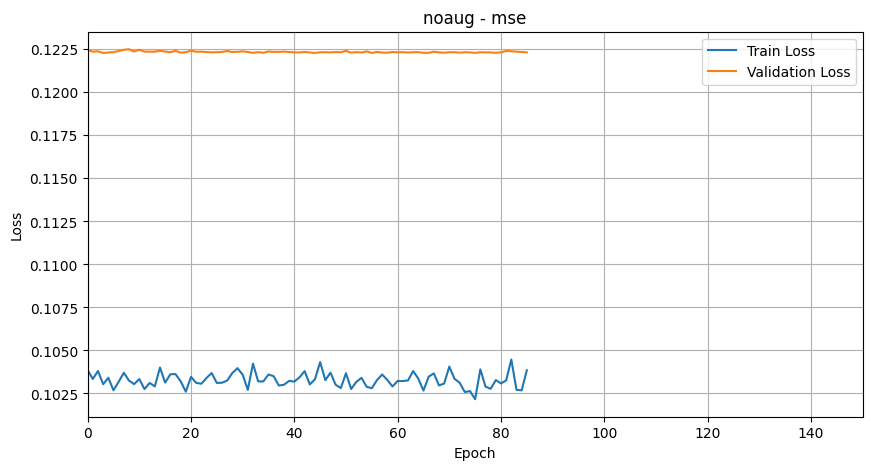

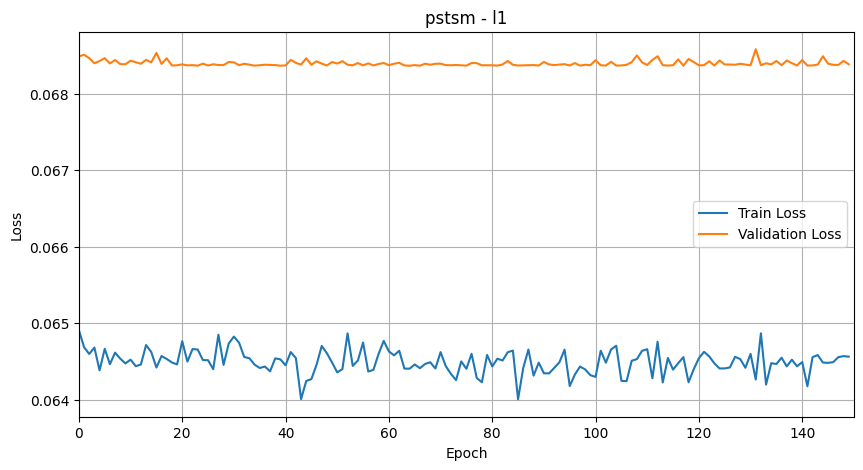

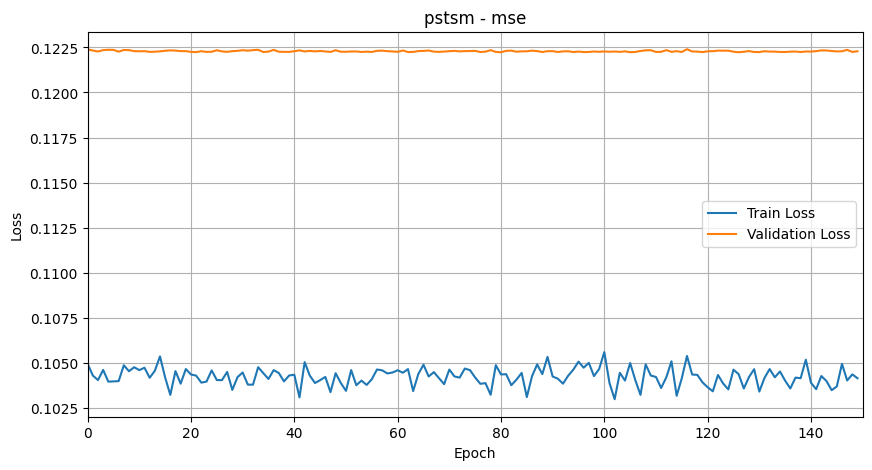

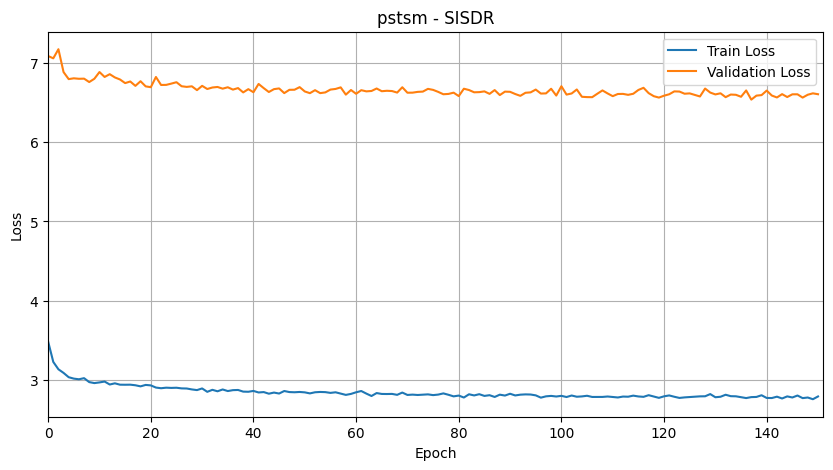

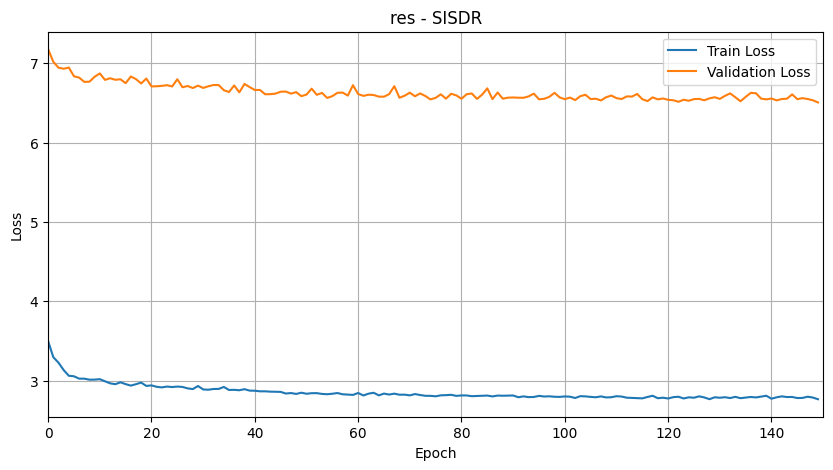

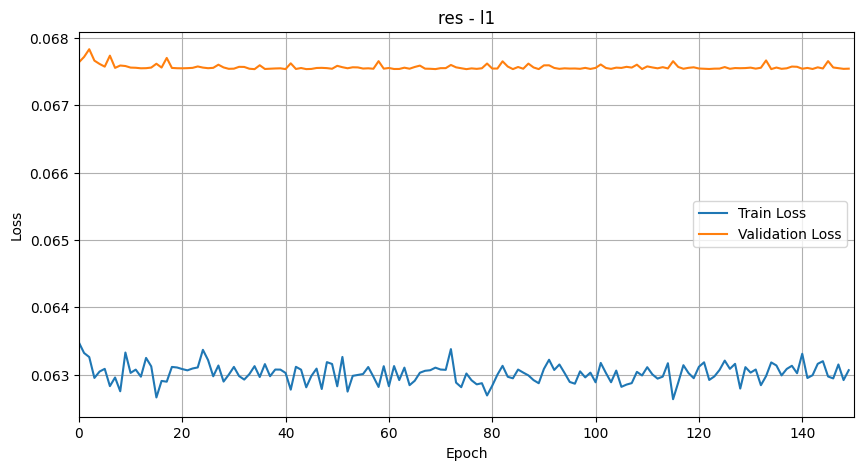

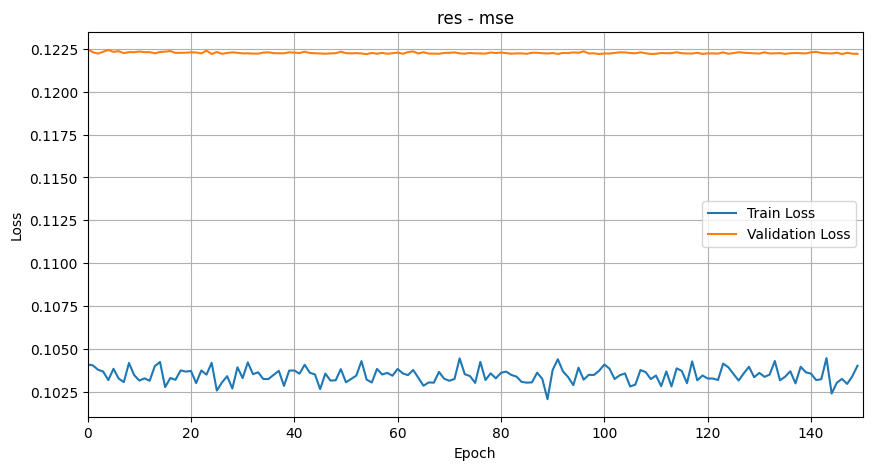

In [4]:
for df in dfs:
    plot_trainig(df)